In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit

# 1. Simulation

In [107]:
def p10(theta, phi, t_idle, t_swap, J, omega):
    """
    Calculate the probability of the measuring the |10> state after an idle time and a swap time.
    The initial state is psi_0 = cos(theta/2)|01> + sin(theta/2)e^(i*phi)|10>.
    :param theta: angle of the first qubit
    :param phi: angle of the second qubit
    :param t_idle: idle time
    :param t_swap: swap time
    :param J: coupling strength
    :param omega: frequency detuning between qubits
    """

    if t_swap <= abs(t_idle):
        # use initial state
        return np.power(np.sin(theta/2), 2)
    
    if t_idle < 0:
        # transform t_idle --> -t_idle and omega --> -omega
        return 1/2*(1-np.cos(2*J*(t_swap+t_idle))*np.cos(theta) + np.sin(2*J*(t_swap+t_idle))*np.sin(theta)*np.sin(phi + omega*t_idle)) 
    else:
        return 1/2*(1-np.cos(2*J*(t_swap-t_idle))*np.cos(theta) + np.sin(2*J*(t_swap-t_idle))*np.sin(theta)*np.sin(phi - omega*t_idle)) 
    

def p01(theta, phi, t_idle, t_swap, J, omega):
    return 1 - p10(theta, phi, t_idle, t_swap, J, omega)


In [161]:
J = 11 * 2 * np.pi
omega = 400 * 2 * np.pi

# |01> + i|10> state
theta = np.pi/2
phi = np.pi/2
phi = 0

# theta = 0.3*np.pi

print(np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi))

t_swaps = np.linspace(0, 0.145, 101)/2 * 2.5
t_idles = np.linspace(-0.007, 0.007, 101)

0.7071067811865476 (0.7071067811865476+0j)


In [162]:
populations = np.zeros((2, len(t_idles), len(t_swaps)))

for i in range(len(t_idles)):
    t_idle = t_idles[i]
    
    for j in range(len(t_swaps)):
        t_swap = t_swaps[j]
    
        populations[0,i,j] = p01(theta, phi, t_idle, t_swap, J, omega)
        populations[1,i,j] = p10(theta, phi, t_idle, t_swap, J, omega)

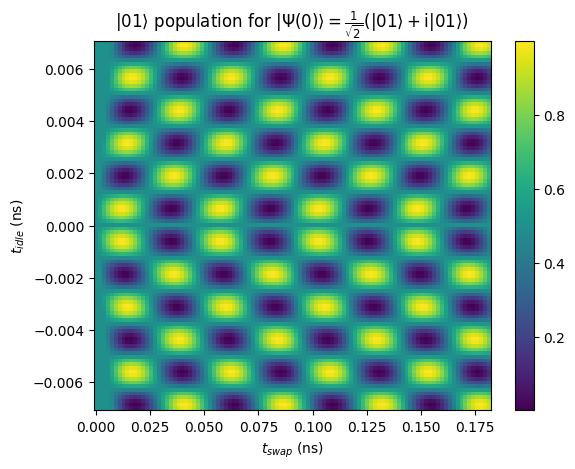

In [163]:
x = t_swaps
y = t_idles

x_step = x[1] - x[0]
y_step = y[1] - y[0]


plt.imshow(populations[0], extent=(x[0] - x_step/2, x[-1] + x_step/2, y[0] - y_step/2, y[-1] + y_step/2),
          interpolation='none', aspect='auto')

plt.colorbar()

plt.xlabel('$t_{swap}$ (ns)')
plt.ylabel('$t_{idle}$ (ns)')

plt.title('$|01\\rangle$ population for $|\Psi(0)\\rangle = \\frac{1}{\\sqrt{2}}(|01\\rangle + $i$|01\\rangle)$')

plt.show()


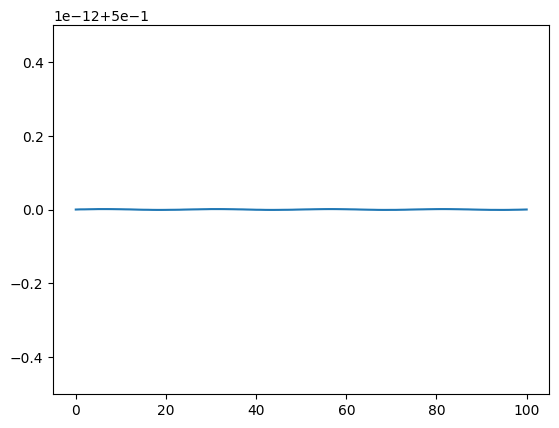

In [167]:
plt.plot(populations[0,101//2,:])
plt.show()

In [140]:
J = 11 * 2 * np.pi
omega = 400 * 2 * np.pi

# |01> state
theta = np.pi
phi = 0

print(np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi))

t_swaps = np.linspace(0, 0.145, 101)
t_idles = np.linspace(-0.007, 0.007, 101)

6.123233995736766e-17 (1+0j)


In [141]:
populations = np.zeros((2, len(t_idles), len(t_swaps)))

for i in range(len(t_idles)):
    t_idle = t_idles[i]
    
    for j in range(len(t_swaps)):
        t_swap = t_swaps[j]
    
        populations[0,i,j] = p01(theta, phi, t_idle, t_swap, J, omega)
        populations[1,i,j] = p10(theta, phi, t_idle, t_swap, J, omega)

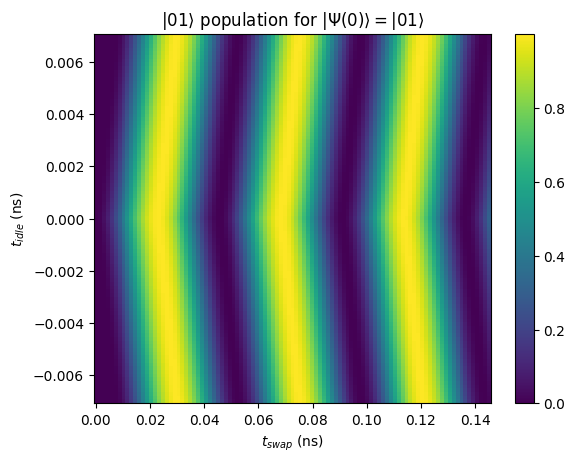

In [142]:
x = t_swaps
y = t_idles

x_step = x[1] - x[0]
y_step = y[1] - y[0]


plt.imshow(populations[0], extent=(x[0] - x_step/2, x[-1] + x_step/2, y[0] - y_step/2, y[-1] + y_step/2),
          interpolation='none', aspect='auto')

plt.colorbar()

plt.xlabel('$t_{swap}$ (ns)')
plt.ylabel('$t_{idle}$ (ns)')

plt.title('$|01\\rangle$ population for $|\Psi(0)\\rangle = |01\\rangle$')

plt.show()


# 2. Data

In [ ]:
filename = r"V:\QSimMeasurements\Measurements\4Q_Test_Scalinq\CurrentCalibration_OffsetSweep\CurrentCalibration_OffsetSweep_2025_05_06\CurrentCalibration_OffsetSweep_2025_05_06_20_31_00_data.h5"


with h5py.File(filename, 'r') as f:
    angle = f['angle'][0]
    threshold = f['threshold'][0]

    t_offset = f['t_offset'][()]
    population = f['population'][0,:,:]
    expt_cycles2 = f['expt_cycles2'][()]
    readout_list = f['readout_list'][()]

    print("angle:", angle)
    print("threshold:", threshold)
    print("t_offset:", t_offset.shape)
    print("population:", population.shape)
    print("expt_cycles2:", expt_cycles2.shape)
    print("readout_list:", readout_list.shape)

In [ ]:
x = expt_cycles2
x_step = x[1] - x[0]

y = t_offset
y_step = y[1] - y[0]

extent = [x[0] - x_step / 2, x[-1] + x_step / 2, y[0] - y_step / 2, y[-1] + y_step / 2]

plt.imshow(population, aspect='auto', interpolation='none', cmap='viridis', extent=extent)

plt.xlabel('t (2.32/16 ns)')
plt.ylabel('t_offset')

plt.colorbar(label='Population')

In [ ]:
for i in range(population.shape[0]):
    t_offset_i = t_offset[i]
    if t_offset_i < -10 or t_offset_i > 10:
        continue
    else:
        print(f"t_offset_i: {t_offset_i:.2f} ns")

    if i % 10 == 0:
        plt.plot(x, population[i], label=f"t_offset = {y[i]:.2f} ns")

In [ ]:
def sine_func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

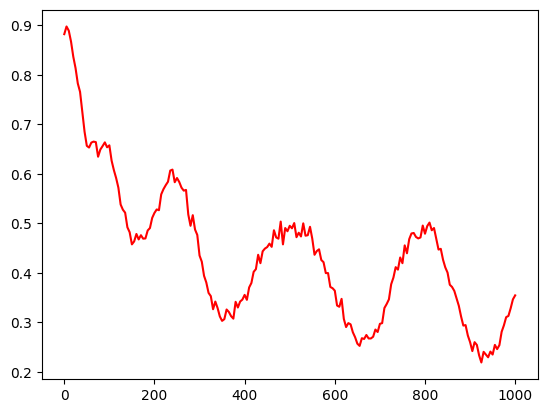

In [77]:

plt.plot(x, population[0,:], label='t_offset = 0 ns', color='red')

In [ ]:
fit_params = []
fit_indices = []

cutoff_index = 50
plot_fits = False

for i in range(population.shape[0]):

    if i < 50 or i > 150:
        continue

    y_data = population[i,:]
    x_data = x

    # Initial guess for sine parameters: amplitude, frequency, phase, offset
    initial_guess = [0.4, 0.02, np.pi/2, np.mean(y_data)]


    

    try:
        params, _ = curve_fit(sine_func, x_data, y_data, p0=initial_guess)
        fit_params.append(params)
        print(f"Slice {i}: Fitted parameters: {params}")
        fit_indices.append(i)
        if plot_fits:
            plt.plot(x_data[cutoff_index:], y_data[cutoff_index:], label="Data", linestyle='None', marker='o')
            plt.plot(x_data[cutoff_index:], sine_func(x_data[cutoff_index:], *params), label="Fit")
            plt.legend()
            plt.show()
    except RuntimeError:
        print(f"Slice {i}: Fit failed")
        plt.plot(x_data[cutoff_index:], y_data[cutoff_index:], label="Data", linestyle='None', marker='o')
        plt.plot(x_data[cutoff_index:], sine_func(x_data[cutoff_index:], *initial_guess), label="Initial Guess")
        plt.legend()
        plt.show()
        # fit_params.append(None)

Slice 50: Fitted parameters: [0.18290921 0.02288624 1.05867014 0.43796182]
Slice 51: Fitted parameters: [0.18378833 0.02289653 1.0542165  0.43781837]
Slice 52: Fitted parameters: [0.25304419 0.0224559  1.13968781 0.43706439]
Slice 53: Fitted parameters: [0.25252948 0.0224842  1.11331274 0.4386273 ]
Slice 54: Fitted parameters: [0.3181434  0.02220972 1.164287   0.44036979]
Slice 55: Fitted parameters: [0.3162182  0.02219399 1.17286019 0.44226311]
Slice 56: Fitted parameters: [0.36189    0.02201638 1.17684727 0.44507187]
Slice 57: Fitted parameters: [0.3608472  0.02202239 1.17642893 0.44379047]
Slice 58: Fitted parameters: [0.39272774 0.02188012 1.16526514 0.45048905]
Slice 59: Fitted parameters: [0.39318651 0.02189932 1.15680223 0.45016579]
Slice 60: Fitted parameters: [0.40711212 0.02176246 1.12818116 0.45551331]
Slice 61: Fitted parameters: [0.40728321 0.02176745 1.11672877 0.45735156]
Slice 62: Fitted parameters: [0.40287106 0.02167193 1.05469064 0.46192429]
Slice 63: Fitted paramete

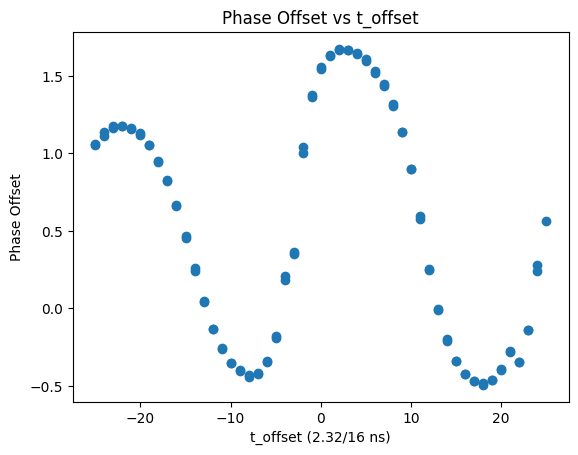

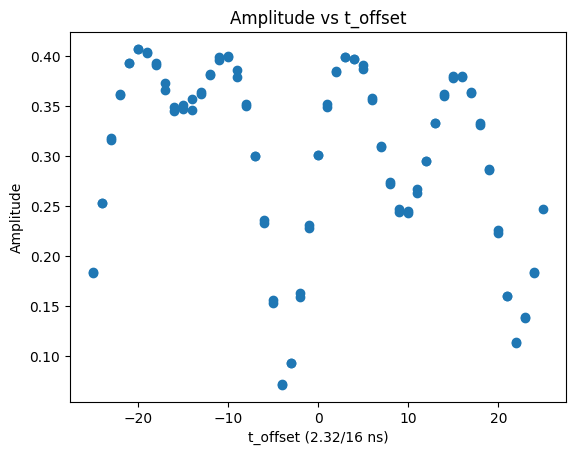

In [78]:
phase_offset = np.array([params[2] for params in fit_params if params is not None])
amplitudes = np.array([params[0] for params in fit_params if params is not None])

plt.plot(t_offset[fit_indices], phase_offset, label="Phase Offset", linestyle='None', marker='o')
plt.xlabel('t_offset (2.32/16 ns)')
plt.ylabel('Phase Offset')
plt.title('Phase Offset vs t_offset')
plt.show()

plt.plot(t_offset[fit_indices], amplitudes, label="Phase Offset", linestyle='None', marker='o')
plt.xlabel('t_offset (2.32/16 ns)')
plt.ylabel('Amplitude')
plt.title('Amplitude vs t_offset')
plt.show()

# for i in range(len(fit_params)):
#     if fit_params[i] is not None:
#         a, b, c, d = fit_params[i]
#         plt.plot(x, sine_func(x, a, b, c, d), label=f"Fit {i}") 


